In [15]:
import gym
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
#แสดงจากlist เป็นตาราง
class Agent():
    def __init__(self):
        self.q_table=np.zeros((5,2))
        self.learning_rate=0.1
        self.discount_factor=0.95
        self.epsilon=0.5
        self.decay_factor=0.999
        self.total_reward=[]
    def play(self,env,number_of_episode=100):
        for i in range(number_of_episode):
            print("episode {} of {}".format(i,number_of_episode))
            state=env.reset()
            self.epsilon*=self.decay_factor
            total_reward=0
            end_game = False
            while not end_game:
                if self.q_table_empty(state) or self.prob(self.epsilon):
                    action= self.action_by_random(env)
                else:
                    action= self.get_action_with_highreward(state)
                
                new_state,reward,end_game,_ = env.step(action)
                #q table
                self.q_table[state,action]+=self.learning_rate*(reward+self.discount_factor*self.getreward(new_state)-self.q_table[state,action])
                total_reward =reward
                state = new_state
            self.total_reward.append(total_reward)
            print(tabulate(self.q_table,showindex="always",headers=["State","Action 0(Forward 1 step)","Action 1(Back to 0)"]))
            
    
    def q_table_empty(self,state):
        return np.sum(self.q_table[state,:])==0
    def action_by_random(self,env):
        return env.action_space.sample()
    def get_action_with_highreward(self,state):
        return np.argmax(self.q_table[state,:])
    def getreward(self,state):
        return np.max(self.q_table[state,:])
    def prob(self,prob):
        return np.random.random()< prob














In [16]:
env=gym.make('NChain-v0')
agent=Agent()
agent.play(env)

            57.0859
      2                     66.3056                55.7059
      3                     73.1574                56.7758
      4                     80.1189                59.7367
episode 54 of 100
  State    Action 0(Forward 1 step)    Action 1(Back to 0)
-------  --------------------------  ---------------------
      0                     58.7664                58.1921
      1                     62.5151                59.4599
      2                     66.6688                61.7718
      3                     73.1075                59.7739
      4                     84.3999                65.1942
episode 55 of 100
  State    Action 0(Forward 1 step)    Action 1(Back to 0)
-------  --------------------------  ---------------------
      0                     58.6524                57.9865
      1                     62.0242                59.2586
      2                     67.7509                60.7345
      3                     75.86                  63.7949


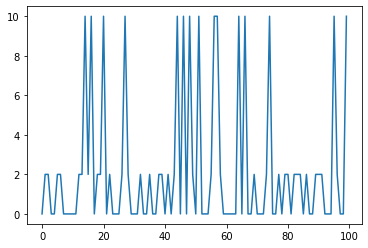

In [17]:
plt.plot(agent.total_reward)